<p>Nom et Prénom: Nguyen Quynh Nhu HO</p>
<p>Groupe: LBD</p>

<h1 style="color:green"> TP1: LE CLUSTERING </h1>

<h2>Objective</h2>

<p>Réaliser des méthodes de clustering, notamment la classification hiérarchique ascendante et la méthode des centroïdes(k-means) pour mettre en oeuvre ces méthodes d'analyse de données.</p>

<h2>Table de matière</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <ol>1. Initiation à Python et à l'usage des principales librairies
        <ul>
            <li>1.1 Tests élémentaires sous Python</li>
                <ol>1.1.1 Création du corpus de test</ol>
            <li>1.2 Méthode de K-means</li>
                <ol>1.2.1 Test de la Méthode de K-means</ol>
                <ol>1.2.2 Choix du "bon" nombre de clusters</ol>
            <li>1.3 Clustering ascendant hiérarchique</li>
        </ul>
    </ol>
    <ol>2. Application dans un contexte de données réelles
        <ul>
            <li>2.1 Utilisation de la méthode K-Means pour la réduction de couleur</li>
            <li>2.2 Clustering de données températures</li>
                <ol>2.2.1 Classification hiérarchique ascendante</ol>
            <li>2.3 Méthode des K-means</li>
            <li>2.4 Comparaison des classifications</li>
        </ul>
    </ol>
    <ol>3. Réalisation algorithmique</ol>
</ul>
</div>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import linkage as CAH
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import scale


import warnings, re, joblib
warnings.filterwarnings("ignore")
import os
os.environ['OMP_NUM_TREADS'] = '1'

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> PARTIE 1</h1>

<b>Initiation à Python et à l'usage des principales librairies.</b>
</div>

<h3>1.1 Tests élémentaires sous Python</h3>

<p style="color:blue"> 1.1.1 Création du corpus de test </p>

* Générer des données: 

In [2]:
# La premiere classe dont 128 individus
mean_1 = np.array([2,2])  # La moyenne
cov_1 = 2*np.eye(2)   # La matrice identité 2x2
class1 = np.random.multivariate_normal(mean_1, cov_1, 128)

# La deuxième classe dont 128 individus
mean_2 = np.array([-4,-4])
cov_2 = 6*np.eye(2)
class2 = np.random.multivariate_normal(mean_2, cov_2, 128)

# Concatener des deux classes pour avoir un ensemble de test
data = np.concatenate((class1,class2), axis=0)

<h4>Q1: Construire l'ensemble de test de taille 256 individus par 2 mesures correspondant aux deux classes. Afficher les deux classes avec des symboles/couleurs différents selon la classe.</h4>

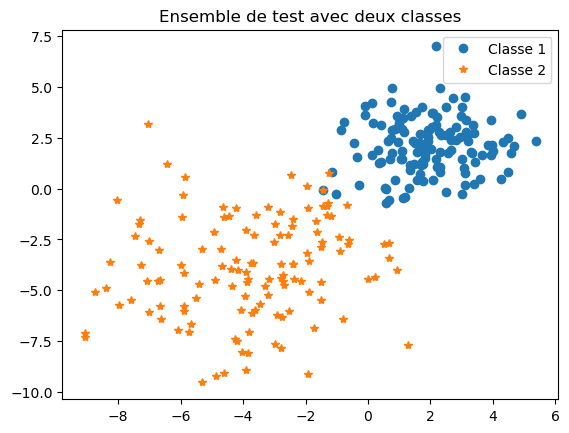

In [3]:
# Affichage des deux classes avec des symboles/couleurs différents
plt.plot(class1[:, 0], class1[:, 1], "o" , label='Classe 1')
plt.plot(class2[:, 0], class2[:, 1], "*" , label='Classe 2')

plt.legend()
plt.title('Ensemble de test avec deux classes')
plt.show()

In [4]:
# Variance de chaque classe
var1 = np.var(class1, axis=0)
var2 = np.var(class2, axis=0)

print(f"Variance de la classe 1: {var1}")
print(f"Variance de la classe 2: {var2}")

Variance de la classe 1: [1.87918475 1.84530671]
Variance de la classe 2: [5.45262104 6.10962159]


><p>Le graphique résultant est que les deux classes sont clairement séparées avec des caractéristiques distinctes. </p><p>Les points de la classe 1 sont centrés autour de la moyenne (2, 2) avec une variance plus faible, tandis que les points de la classe 2 sont centrés autour de la moyenne (-4, -4) avec une variance plus élevée.</p><p>La dispersion des points d'une classe, mesurée par la variance. Une variance plus élevée signifie que les points sont plus éloignés de la moyenne, indiquant une dispersion plus important. On peut voir à partir de trace des deux classes, une variance plus élevée dans la classe 2 suggère une plus grand dispersion des points par rapport à sa moyenne (-4, -4), tandis qu'une variance plus faible dans la classe 1 indique que les points dans cette classe sont moins dispersés autour de sa moyenne, ce qui signifie que les points sont plus regroupés. </p>

<h3>1.2 Méthode de K-means</h3>

<p style="color:blue"> 1.2.1 Test de la Méthode de K-means </p>

<h4>Q1: Effectuer le clustering de données data en K clusters par la méthode de K-means</h4>

In [5]:
# J'ai déclaré 2 clusters
K = 2
# Initialiser l'objet KMeans 
kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++')
#la méthode fit sur les données (data) pour effectuer le clustering
kmeans.fit(data)

  File "C:\Users\33766\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=2, n_init=1)

In [6]:
#Interpréter le résultat de clustering
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

J'ai choisi deux clusters (K=2), les valeurs dans le tableau 'labels' sont 0 ou 1.
* Les points ayant l'étiquette 0 appartiennent au premier cluster.
* Les points ayant l'étiquette 1 appartiennent au deuxième cluster.

<h4>Q2: Essayez différentes valeurs de nombre de clusters K. Interpréeter le résultat de clustering donné par l’attribut kmeans.labels</h4>

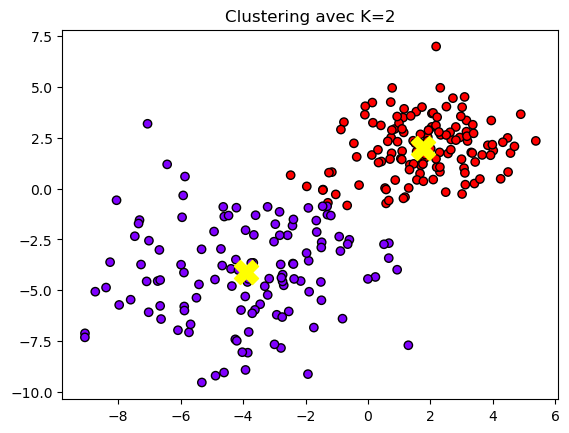

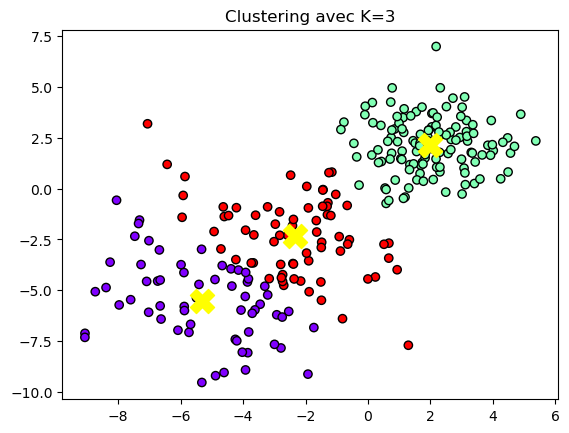

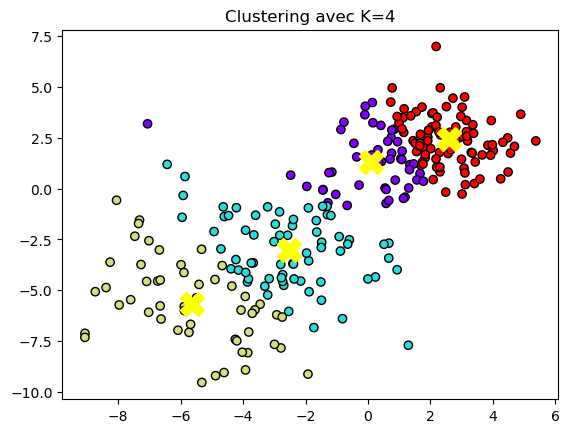

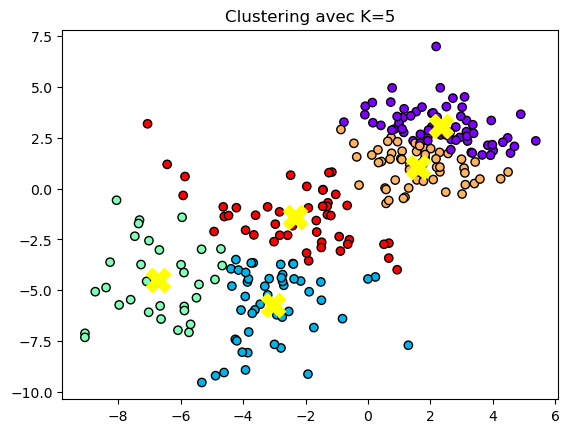

In [7]:
for K in range(2, 6):  # Tester K de 2 à 5
    kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++')
    # Effectuer le clustering avec l'algo K-means
    kmeans.fit(data)

    # Récupérer les labels
    labels = kmeans.labels_

    # Afficher les points de données avec des couleurs différentes selon les clusters c=labels
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k')
    # Afficher les centroids de chaque cluster en jaune
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='X', c='yellow', label='Centroides')
    plt.title(f'Clustering avec K={K}')
    plt.show()

En analysant visuellement les résultats du clustering, pour:

1. **K = 2 :**
   Le clustering semble bien séparer les données en deux clusters distincts. Les centroids marqués en jaune sont placés au centre de chaque cluster.

2. **K = 3 :**
   L'algorithme tente de diviser les données en trois clusters. Les centroids sont positionnés au centre de chaque cluster.

3. **K = 4 et K = 5 :**
   La valeur K augmente, l'algorithme trouve des partitions plus fines des données. Cependant, cela pourrait conduire à une sur-segmentation, où certains clusters peuvent sembler peu significatifs.


<h4>Q3: Afficher graphiquement le résultat du clustering avec deux couleurs/symboles à l’aide de kmeans.labels. Etudier les différences avec la “vraie” classification adjusted rand score du module metrics de la bibliothéque sklearn permet de calculer l’erreur entre la classification obtenue et la classification “vraie”. Etudier l’aide pour comprendre la mesure.</h4>

Adjusted Rand Score : 0.8784313725490196


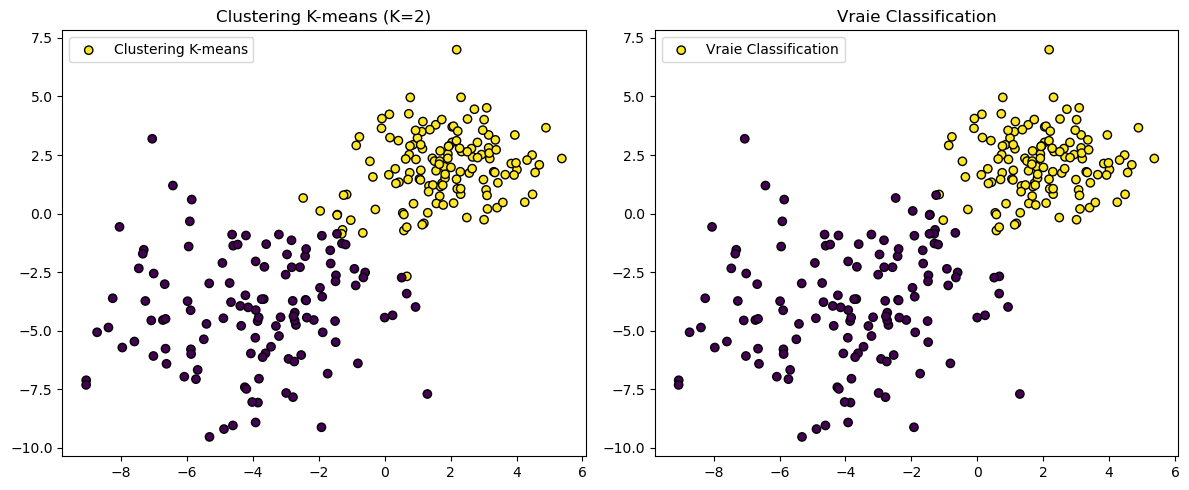

In [8]:
# Appliquer l'algo avec 2 clusters
K = 2
kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++')
kmeans.fit(data)

# Les étiquettes résultantes du clustering sont stockées dans labels
labels = kmeans.labels_

# La vraie classification (étiquettes réelles)
# Créer un ensemble de 128 zéros (classe 1) suivis de 128 uns (classe 2). Cela suppose que les 128 premiers individus appartiennent à la classe 0 et les 128 suivants à la classe 1.
true_labels = np.concatenate((np.ones(128),np.zeros(128)))


# Calculer l'Adjusted Rand Score taux d'erreur
# pour évaluer la similitude entre les étiquettes réelles et celles prédites par K-means
score = adjusted_rand_score(true_labels, labels)
print(f"Adjusted Rand Score : {score}")

# Créer une figure avec deux sous-graphes côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Premier sous-graphe : Résultat du clustering K-means
axes[0].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', label='Clustering K-means')
axes[0].set_title(f'Clustering K-means (K={K})')
axes[0].legend()

# Deuxième sous-graphe : Vraie classification
axes[1].scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolor='k', label='Vraie Classification')
axes[1].set_title('Vraie Classification')
axes[1].legend()


# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher la figure
plt.show()
 

> L’indice Rand ajusté est ainsi assuré d’avoir une valeur proche de 0,0 pour l’étiquetage aléatoire indépendamment du nombre de clusters et d’échantillons, et exactement de 1,0 lorsque les clusterings sont identiques (jusqu’à une permutation). L’indice Rand ajusté est limité ci-dessous par -0,5 pour les clusterings particulièrement discordants. 
(DOC: <a>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html</a>)

* Dans notre cas, l'Adjusted Rand Score de pres de 1 suggère une correspondance très élevée entre les étiquettes prédites par K-means et les véritables étiquettes. 
* Les deux sous-graphes montrent visuellement les résultats du clustering K-means (sous-graphe 1) et les vraies étiquettes (sous-graphe 2). Chaque point de données est représenté en fonction de ses coordonnées x et y, et la couleur des points indique leur classe. 

<h4>Q4: Utiliser la fonction adjusted rand score pour calculer le taux d’erreur.</h4>

Le taux d'erreur 'Adjusted Rand Score'  est calculé en question 3

<h4>Q.5: 
    A quoi sert le paramètre n_init ?
    Essayer une autre valeur que 1 et commenter les différences (ou l’absence de différences).</h4>

n_init 'auto' ou int, par défaut=10
-> Nombre de fois que l'algorithme k-means est exécuté avec différentes valeurs de départ du centre. Le résultat final est le meilleur résultat de n_init exécutions consécutives en termes d'inertie (la somme des carrés des distances des points au centre le plus proche).

* n_init = 20

Adjusted Rand Score : 0.8784313725490196


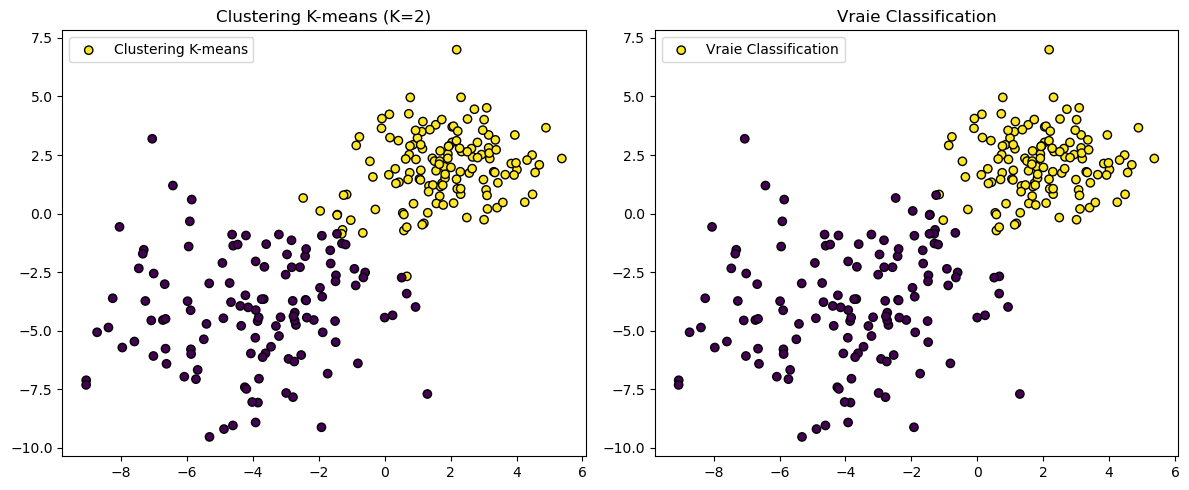

In [9]:
# Effectuer le clustering avec K-means
K = 2
kmeans = KMeans(n_clusters=K, n_init=20, init='k-means++')
kmeans.fit(data)

# Récupérer les labels du clustering
labels = kmeans.labels_

# La vraie classification (étiquettes réelles)
# Créer un ensemble de 128 zéros (classe 1) suivis de 128 uns (classe 2). Cela suppose que les 128 premiers individus appartiennent à la classe 0 et les 128 suivants à la classe 1.
true_labels = np.concatenate(( np.ones(128), np.zeros(128)))


# Calculer l'Adjusted Rand Score taux d'erreur
score = adjusted_rand_score(true_labels, labels)
print(f"Adjusted Rand Score : {score}")

# Créer une figure avec deux sous-graphes côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Premier sous-graphe : Résultat du clustering K-means
axes[0].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', label='Clustering K-means')
axes[0].set_title(f'Clustering K-means (K={K})')
axes[0].legend()

# Deuxième sous-graphe : Vraie classification
axes[1].scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolor='k', label='Vraie Classification')
axes[1].set_title('Vraie Classification')
axes[1].legend()


# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher la figure
plt.show()


><p>L'algorithme K-means a été exécuté 20 fois avec différentes initialisations des centroides.</p><p>En passant à <strong>n_init = 20</strong>, le modèle a eu davantage d'opportunités pour converger vers un résultat optimal, le score Adjusted Rand est légèrement plus élevé par rapport à la première exécution. Cela suggère que, dans ce cas particulier, augmenter le nombre d'initialisations a conduit à une meilleure concordance avec la classification réelle.

<p style="color:blue"> 1.2.2 Choix du "bon" nombre de clusters </p>

> Le coeufficient de silhouette est une mesure de la qualité d'un clustering, indiquant à quel point les objets d'un cluster sont similaires entre eux par rapport aux objets des autres clusters, fournissant ainsi une évaluation quantative de la quantité de la classification obtenue par un algo de clustering. 

> * Coefficient de silhouette élevé (proche de 1) :
Indique que l'objet est bien assorti à son propre cluster et mal assorti aux clusters voisins.
Préférable d'avoir un coefficient de silhouette élevé.

> * Coefficient de silhouette proche de 0 :
Indique un chevauchement significatif des clusters.
Peut se produire si les clusters sont trop proches ou si le nombre de clusters est incorrect.

> * Coefficient de silhouette négatif :
Très rare en pratique avec la métrique utilisée ici (euclidienne).
Indique généralement que l'échantillon a été affecté au mauvais cluster

> Le coefficient d'inertie(la somme des carrés intra-cluster) en méthode K-means est une mesure utilisée pour évaluer la qualité de la partition des données en clusters. L'objectif du K-means est de minimiser cette somme des carrés intra-cluster.

<h4>Q1: Séparer les données data en K = 2,3,4,5,6 clusters à l’aide de la fonction KMeans</h4>
<h4>Q2: Calculer les largeurs de silhouettes des observations et le coefficient de silhouette</h4>
<h4>Q3: Extraire le coefficient d’inertie selon le nombre de clusters (champ kmeans.inertia ). Afficher
le coefficient de silhouette et l’inertie selon le nombre de classes.</h4>

In [10]:
# Q. 1 Séparer les données en K = 2, 3, 4, 5, 6 clusters à l'aide de la fonction KMeans
for K in range(2, 7):
    kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    # Q. 2 Calculer les largeurs de silhouettes des observations et le coefficient de silhouette
    silhouette_avg = silhouette_score(data, cluster_labels)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    print("Pour le nombre de clusters K = {}, le coefficient de silhouette est {:.2f}".format(K, silhouette_avg))

    # Q. 3 Extraire le coefficient d'inertie (inertie intra-classe) et afficher le résultat
    inertia = kmeans.inertia_
    print("Pour le nombre de clusters K = {}, le coefficient d'inertie est {:.2f}".format(K, inertia))

Pour le nombre de clusters K = 2, le coefficient de silhouette est 0.59
Pour le nombre de clusters K = 2, le coefficient d'inertie est 1921.17
Pour le nombre de clusters K = 3, le coefficient de silhouette est 0.47
Pour le nombre de clusters K = 3, le coefficient d'inertie est 1350.88
Pour le nombre de clusters K = 4, le coefficient de silhouette est 0.45
Pour le nombre de clusters K = 4, le coefficient d'inertie est 1066.16
Pour le nombre de clusters K = 5, le coefficient de silhouette est 0.45
Pour le nombre de clusters K = 5, le coefficient d'inertie est 891.67
Pour le nombre de clusters K = 6, le coefficient de silhouette est 0.33
Pour le nombre de clusters K = 6, le coefficient d'inertie est 753.89


<h4>Q4: Choisir le meilleur paramètre K pour le clustering.</h4>

En se basant sur les résultats de coefficient de silhouette:
<ul>
    <li>K=2 : 
       <ol>Le coefficient de silhouette est relativement élevé à 0.61, indiquant une bonne séparation des clusters.</ol>
       <ol>Le coefficient d'inertie est de 2071.11, ce qui donne une idée de la dispersion des points par rapport au centre de leur cluster.</ol>
    </li>
    <li>K=3 :
        <ol>Le coefficient de silhouette est également décent à 0.50, mais légèrement moins que pour K=2.</ol>
        <ol>Le coefficient d'inertie diminue à 1538.79, indiquant une réduction de la dispersion par rapport à K=2.</ol>
    </li>
     <li>K=4 à 6 :
        <ol>Les coefficients de silhouette diminuent, indiquant une diminution de la séparation entre les clusters.</ol>
        <ol>Cela peut indiquer que la qualité de la séparation entre les clusters diminue avec un nombre croissant de clusters.</ol>
    </li>
</ul>
    
> En fonction de ces résultats, on pourrait conclure que le <strong>choix optimal</strong> de clusters semble être <strong>K = 2</strong>, car il présente le coefficient de silhouette le plus élevé. 

<h3>1.3 Clustering ascendant hiérarchique</h3>

<h4>Q1: Appliquer l’algorithme de clustering ascendant (CAH) du module cluster de la bibliothèque scipy en utilisant l’objet hierarchy</h4>

In [11]:
# Calculer la matrice de liaison (linkage matrix) avec la méthode complète et la distance euclidienne
Z_complete = CAH(data, method='complete', metric='euclidean')
Z_complete

array([[3.30000000e+01, 6.80000000e+01, 1.98626307e-02, 2.00000000e+00],
       [9.00000000e+00, 2.37000000e+02, 2.30344124e-02, 2.00000000e+00],
       [1.63000000e+02, 2.41000000e+02, 2.97281995e-02, 2.00000000e+00],
       ...,
       [5.03000000e+02, 5.05000000e+02, 1.07808841e+01, 7.10000000e+01],
       [5.07000000e+02, 5.08000000e+02, 1.37278686e+01, 1.32000000e+02],
       [5.04000000e+02, 5.09000000e+02, 1.82015897e+01, 2.56000000e+02]])

<h4>Q2: Afficher le dendrogramme sans seuil</h4>

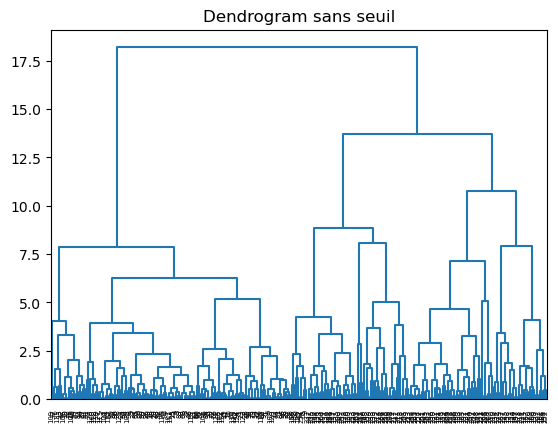

In [12]:
# Pour affichier dendrogramme sans seuil -> option no_lablels = True
dendrogram(Z_complete, color_threshold=0)
plt.title('Dendrogram sans seuil')
plt.show()

<h4>Q3: Afficher le dendrogramme pour K = 3 clusters. Pour cela, choisir le seuil adapté (paramètre color threshold).</h4>

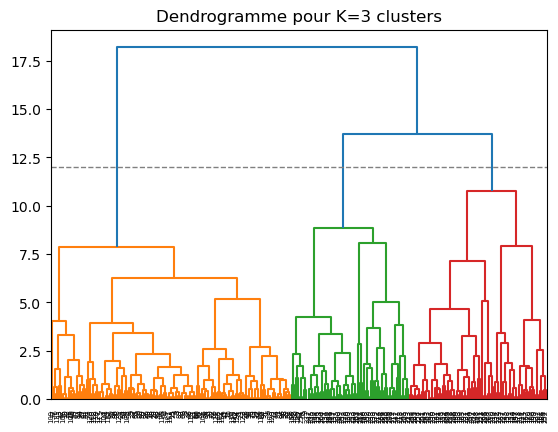

In [13]:
# Calculer la matrice de liaison (linkage matrix) avec la méthode complète et la distance euclidienne
Z_complete = CAH(data, method='complete', metric='euclidean')

# Choisissez le seuil adapté pour K=3 clusters
seuil = 12

# Afficher le dendrogramme avec le seuil
dendrogram(Z_complete, color_threshold = seuil)
plt.title('Dendrogramme pour K=3 clusters')
plt.axhline(y=seuil, c='grey', lw=1, linestyle='dashed')  # Ajouter la ligne horizontale de la coupe
plt.show()


> La ligne horizontale en pointillés (ligne de coupe) sur le dendrogramme indique à quel niveau l'arbre a été coupé.
J'ai choisi un seuil de 12, ce qui signifie que je coupe l'arbre à une hauteur de 12 unités sur l'axe vertical du dendrogramme, résultant en une classification en K=3 clusters. 

<h4>Q4: Choisir le seuil automatiquement à l’aide de la troisième variable Z complete[,2] de
Z complete qui donne la hauteur de dendrogramme des clusters fusionnés à chaque étape.</h4>

La matrice de liaison générée par l'algorithme CAH contient quatre colonnes : les deux premières colonnes correspondent aux indices des clusters fusionnés, la troisième colonne correspond aux hauteurs de fusion, et la quatrième colonne contient le nombre d'observations dans le nouveau cluster.

k=3
automatic_threshold = Z_complete[256-k, 2]


<h4>Q5: Afficher graphiquement le résultat du clustering avec trois couleurs/symboles à l’aide de groupes cah. Analyser la classification.</h4>

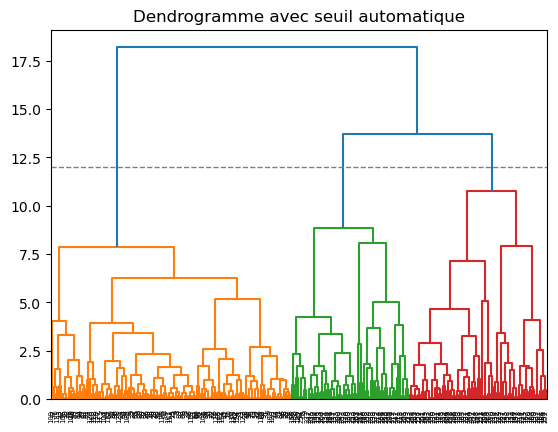

[[3.30000000e+01 6.80000000e+01 1.98626307e-02 2.00000000e+00]
 [9.00000000e+00 2.37000000e+02 2.30344124e-02 2.00000000e+00]
 [1.63000000e+02 2.41000000e+02 2.97281995e-02 2.00000000e+00]
 ...
 [5.03000000e+02 5.05000000e+02 1.07808841e+01 7.10000000e+01]
 [5.07000000e+02 5.08000000e+02 1.37278686e+01 1.32000000e+02]
 [5.04000000e+02 5.09000000e+02 1.82015897e+01 2.56000000e+02]]


In [14]:
# Calculer la matrice de liaison (linkage matrix) avec la méthode complète et la distance euclidienne
Z_complete = CAH(data, method='complete', metric='euclidean')

k=3
# Choisir le seuil automatiquement 
automatic_threshold =  Z_complete[256-k, 2]

groupes_cah= fcluster(Z_complete, t=automatic_threshold, criterion ='distance')

# Afficher le dendrogramme avec le seuil automatique et la coloration basée sur la distance
dendrogram(Z_complete, color_threshold=automatic_threshold)
plt.axhline(y=seuil, c='grey', lw=1, linestyle='dashed')  # Ajouter la ligne horizontale de la coupe
plt.title('Dendrogramme avec seuil automatique')
plt.show()
print(Z_complete)

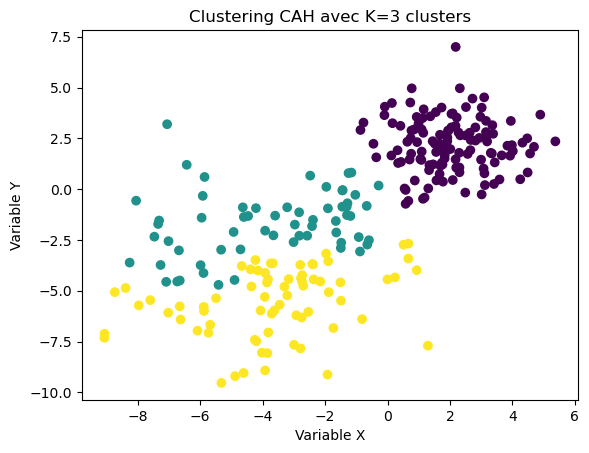

In [15]:
Z_complete = CAH(data, method='complete', metric='euclidean')

# Choisir le nombre de clusters (k)
k = 3

automatic_threshold =  Z_complete[-3, 2]
# Effectuer le clustering en utilisant le seuil automatique
groupes_cah = fcluster(Z_complete, t=automatic_threshold, criterion='distance')


# Créer le graphique scatter avec trois couleurs/symboles pour les trois clusters
plt.scatter(data[:, 0], data[:, 1], c=groupes_cah, cmap='viridis', marker='o')
plt.title('Clustering CAH avec K=3 clusters')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

<h4>Q6: Comparer les résultats de clustering en K = 2 clusters avec les quatre méthodes : lien simple single, lien complet complete, lien moyen average, et la dissimilarité de Ward.
Présenter quatre dendrogrammes sur le même graphe. Comparer avec le résultats obtenus avec K-Means.</h4>

In [16]:
# Effectuer CAH avec différentes méthodes 
methods = ['single', 'complete', 'average', 'ward']
linkages = [CAH(data, method=method, metric='euclidean') for method in methods]

# Calculer les étiquettes de clustering pour chaque méthode 
# t=2 (2 clusters), criterion='maxclust' -> critère de coupe est basé sur le nombre maximale de clusters
labels_single = fcluster(linkages[0], t=2, criterion='maxclust')
labels_complete = fcluster(linkages[1], t=2, criterion='maxclust')
labels_average = fcluster(linkages[2], t=2, criterion='maxclust')
labels_ward = fcluster(linkages[3], t=2, criterion='maxclust')


# Calculer le coefficient de silhouette pour chaque méthode
silhouette_single = silhouette_score(data, labels_single)
silhouette_complete = silhouette_score(data, labels_complete)
silhouette_average = silhouette_score(data, labels_average)
silhouette_ward = silhouette_score(data, labels_ward)



# 2 clusters
K = 2
# Initialiser l'objet KMeans 
kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++')
#la méthode fit sur les données (data) pour effectuer le clustering
kmeans.fit(data)
#Interpréter le résultat de clustering
labels_kmeans = kmeans.labels_

# Calculer l'Adjusted Rand Score pour chaque méthode par rapport à K-Means
ars_single = adjusted_rand_score(labels_kmeans, labels_single)
ars_complete = adjusted_rand_score(labels_kmeans, labels_complete)
ars_average = adjusted_rand_score(labels_kmeans, labels_average)
ars_ward = adjusted_rand_score(labels_kmeans, labels_ward)


print("\nSilhouette Scores:")
print(f"Méthode Single : {silhouette_single}")
print(f"Méthode Complete : {silhouette_complete}")
print(f"Méthode Average : {silhouette_average}")
print(f"Méthode Ward : {silhouette_ward}")

print("\nAdjusted Rand Scores:")
print(f"Méthode Single : {ars_single}")
print(f"Méthode Complete : {ars_complete}")
print(f"Méthode Average : {ars_average}")
print(f"Méthode Ward : {ars_ward}")



Silhouette Scores:
Méthode Single : 0.23739675147102118
Méthode Complete : 0.5798392619644406
Méthode Average : 0.5798392619644406
Méthode Ward : 0.5493435797787125

Adjusted Rand Scores:
Méthode Single : 0.0010416666666666667
Méthode Complete : 0.8205882352941176
Méthode Average : 0.8205882352941176
Méthode Ward : 0.7107843137254902


><p>Pour un nombre de cluster K=2</p><p><strong>Cofficient de Silhouette: </strong>Le résultat du coefficient de silhouette suggère que les méthodes de liaison average et complete ont produit des clusters de meilleure qualité dans l'ensemble de données par rapport à single et complete.</p><p><strong>Adjusted Rand Score: </strong>Les valeurs élevées du score d'Adjusted Rand indique une concordance élevée avec les étiquettes de clustering K-Means. Les méthodes de liasion average et complete en CAH ont des scores élevés par rapport à K-Means.</p>


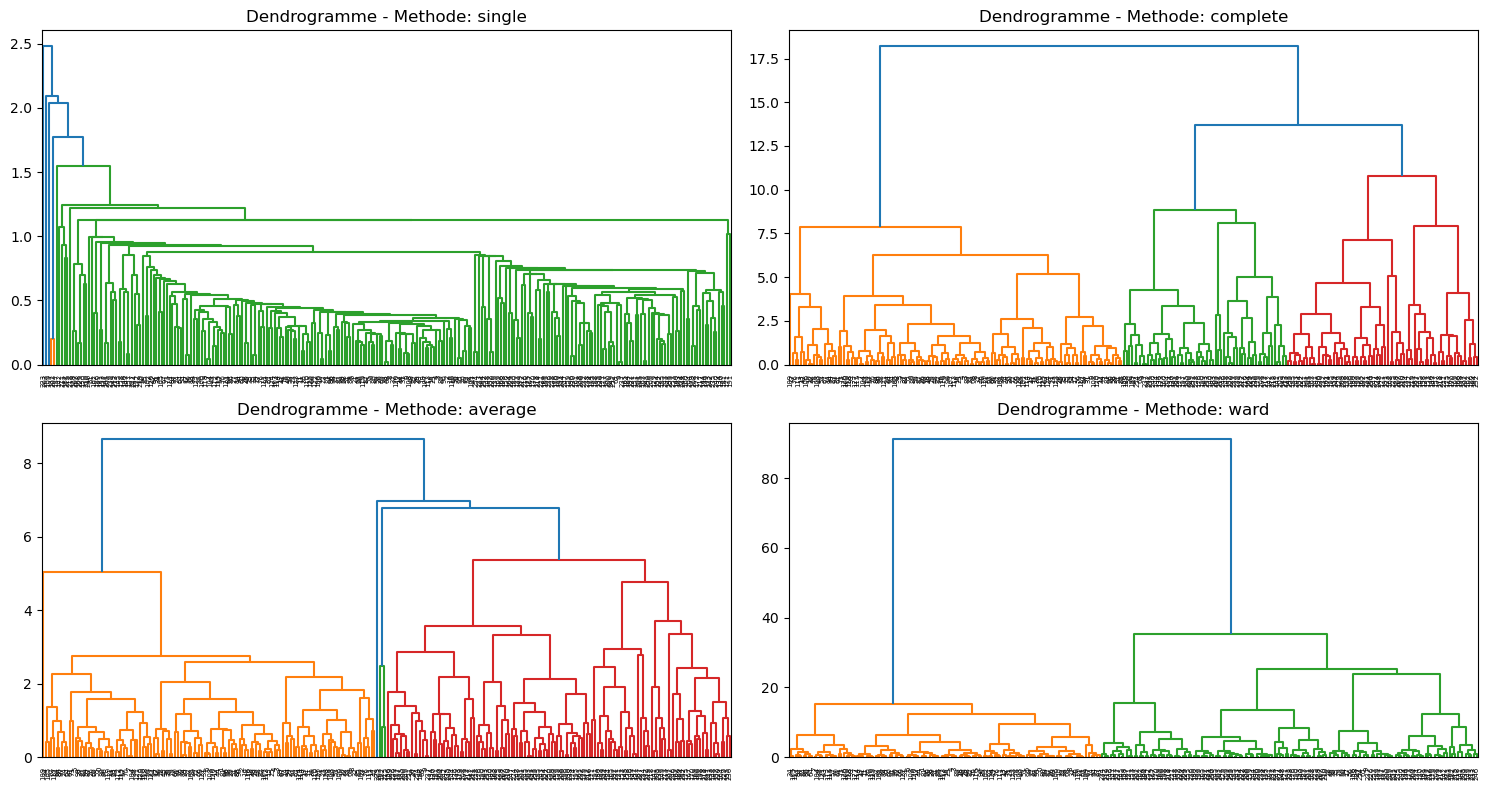

In [17]:
# Afficher les dendrogrammes sur le même graphique
plt.figure(figsize=(15, 8))


for i, method in enumerate(methods):
    plt.subplot(2, 2, i + 1)
    dendrogram(linkages[i])
    plt.title(f'Dendrogramme - Methode: {method}')
    
    
plt.tight_layout()
plt.show()

><p>Les dendrogrammes pour average et complete présentent des structures plus claires, suggérant une meilleure séparation des clusters.</p><p>Les dendrogrammes pour single et complete peuvent montrer une fusion trop rapide ou une séparation insuffisante.</p>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> PARTIE 2</h1>

<b>Application dans un contexte de données réelles</b>
</div>

<h3>2.1 Utilisation de la méthode K-Means pour la réduction de couleur</h3>

<h4>Q1: </h4>

In [18]:
# Charger l'image
import matplotlib.image as mpimg
img = np.float32(mpimg.imread('visage.bmp'))
print("Shape de l'image originale: ", img.shape)

Shape de l'image originale:  (256, 256, 3)


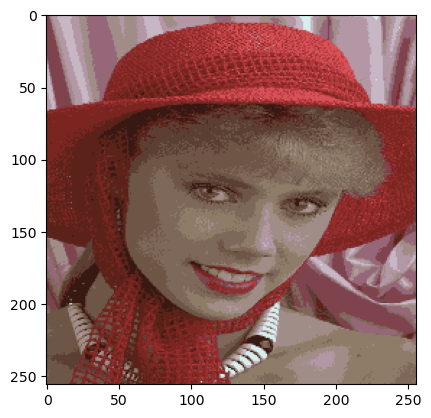

In [19]:
# Organiser les données de l'image couleur sous la forme d'un tableau 256 × 256 lignes et 3 colonnes
data = np.reshape(img, (256*256, 3))

# Définir le nombre de couleurs à conserver après transformation 
K = 16 

# Appliquer l'algorithme K-Means
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(data)

# Remplacer chaque couleur de l'image d'origine par son code
coded_img = kmeans.labels_.reshape(256, 256)

# Remplacer le code dans l'image compressée par la couleur associée
decoded_img = kmeans.cluster_centers_[kmeans.labels_, :].reshape(256, 256, 3)

# Réorganiser les données de l'image couleur sous la forme d'un tableau 256 × 256 × 3
res = decoded_img.reshape(256, 256, 3)

# Visualiser l'image résultante de la compression
plt.imshow(res/255)
plt.show()


<h4>Q2: Faire plusieurs tests en faisaint varier K</h4>

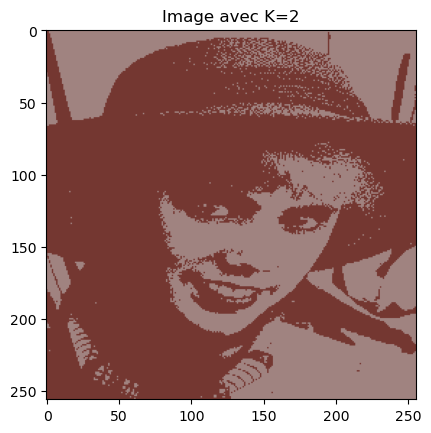

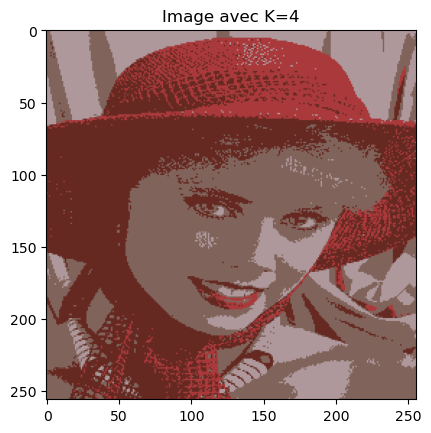

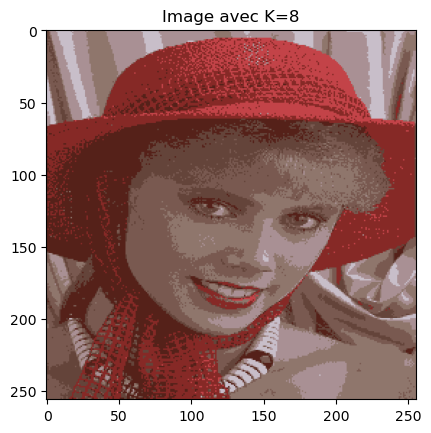

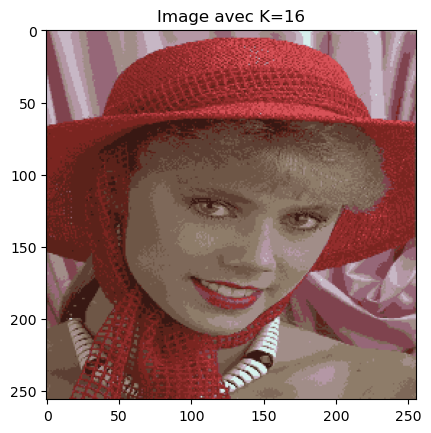

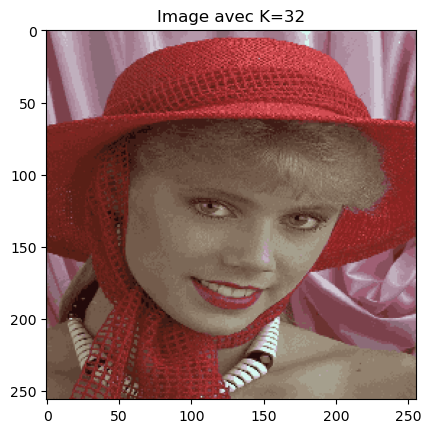

In [20]:
# Test en faisant varier K
for k_value in [2, 4, 8, 16, 32]:
    kmeans = KMeans(n_clusters=k_value, random_state=0)
    kmeans.fit(data)

    coded_img = kmeans.labels_.reshape(256, 256)
    decoded_img = kmeans.cluster_centers_[kmeans.labels_, :].reshape(256, 256, 3)
    res = decoded_img.reshape(256, 256, 3)

    plt.imshow(res/255)
    plt.title(f'Image avec K={k_value}')
    plt.show()


><p><strong>K faible: </strong>Comme K=2, la compression de l'image pourrait regrouper des couleurs similaires, conduisant à une perte de nuances.</p><p><strong>K moyen: </strong>Par exemple à K=8 ou K=16, l'image compressée pourrait conserver davantage de détails et de nuances de couleurs.</p><p><strong>K élevé: </strong>Avec une valeur élevé de K par exemple 32, l'image compressée avec une fidélité élevée, où la plupart des couleurs originals sont conservées.</p>

<h3>2.2 Clustering de données de températures</h3>

In [21]:
df = pd.read_csv("temperatures.csv",sep=";", decimal=".", header=0, index_col=0)
n = len(df)

In [22]:
df.head()

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region
City,,,,,,,,,,,,,,,,,
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.4,4.9,Ouest
Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,40.0,23.7,Sud
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.5,13.4,Ouest
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.8,4.3,Ouest
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.5,19.0,Est


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, Amsterdam to Zurich
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Janvier    35 non-null     float64
 1   Fevrier    35 non-null     float64
 2   Mars       35 non-null     float64
 3   Avril      35 non-null     float64
 4   Mai        35 non-null     float64
 5   Juin       35 non-null     float64
 6   Juillet    35 non-null     float64
 7   Aout       35 non-null     float64
 8   Septembre  35 non-null     float64
 9   Octobre    35 non-null     float64
 10  Novembre   35 non-null     float64
 11  Decembre   35 non-null     float64
 12  Moyenne    35 non-null     float64
 13  Amplitude  35 non-null     float64
 14  Latitude   35 non-null     float64
 15  Longitude  35 non-null     float64
 16  Region     35 non-null     object 
dtypes: float64(16), object(1)
memory usage: 4.9+ KB


In [24]:
df.shape

(35, 17)

In [25]:
# Supprimer les colonnes ne vont pas être utilisées pour établir les clusters
df = df.drop(columns=['Region','Moyenne','Amplitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, Amsterdam to Zurich
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Janvier    35 non-null     float64
 1   Fevrier    35 non-null     float64
 2   Mars       35 non-null     float64
 3   Avril      35 non-null     float64
 4   Mai        35 non-null     float64
 5   Juin       35 non-null     float64
 6   Juillet    35 non-null     float64
 7   Aout       35 non-null     float64
 8   Septembre  35 non-null     float64
 9   Octobre    35 non-null     float64
 10  Novembre   35 non-null     float64
 11  Decembre   35 non-null     float64
 12  Latitude   35 non-null     float64
 13  Longitude  35 non-null     float64
dtypes: float64(14)
memory usage: 4.1+ KB


<p style="color:blue"> 2.2.1 Classification hiérarchique ascendante</p>

<h4>Q1: Calculer la matrice de dissimilarité entre tous les individus.</h4>

In [26]:
from scipy.spatial.distance import pdist, squareform

# Normaliser les données 
scaled_data = scale(df)
distance_matrix = pdist(scaled_data)  # Utiliser la distance euclidienne par défaut

# Convertir la matrice de distance en format carré
square_distance_matrix = squareform(distance_matrix)

print("Matrice de dissimilarité :\n", square_distance_matrix)

Matrice de dissimilarité :
 [[ 0.          7.58192482  1.56404966 ...  7.62825376  5.36877962
   1.74379985]
 [ 7.58192482  0.          7.67507841 ...  2.53254991 11.14912617
   7.8949003 ]
 [ 1.56404966  7.67507841  0.         ...  8.02239365  4.24830008
   0.98430985]
 ...
 [ 7.62825376  2.53254991  8.02239365 ...  0.         11.87308293
   8.08026917]
 [ 5.36877962 11.14912617  4.24830008 ... 11.87308293  0.
   4.44604863]
 [ 1.74379985  7.8949003   0.98430985 ...  8.08026917  4.44604863
   0.        ]]


><p>La matrice de dissimilaritté calculée montre les distances euclidiennes entre chaque paire d'individus après normalisation des données. Plus la valeur est élevée, plus les individus sont dissimilaires</p><p> La matrice de dissimilarité est symétrique par rapport à la diagonale principale (diagonale de zéros), car la dissimilarité entre ville A et ville B est la même que la dissimilarité entre ville B et ville A.</p>

Text(0, 0.5, 'Distance')

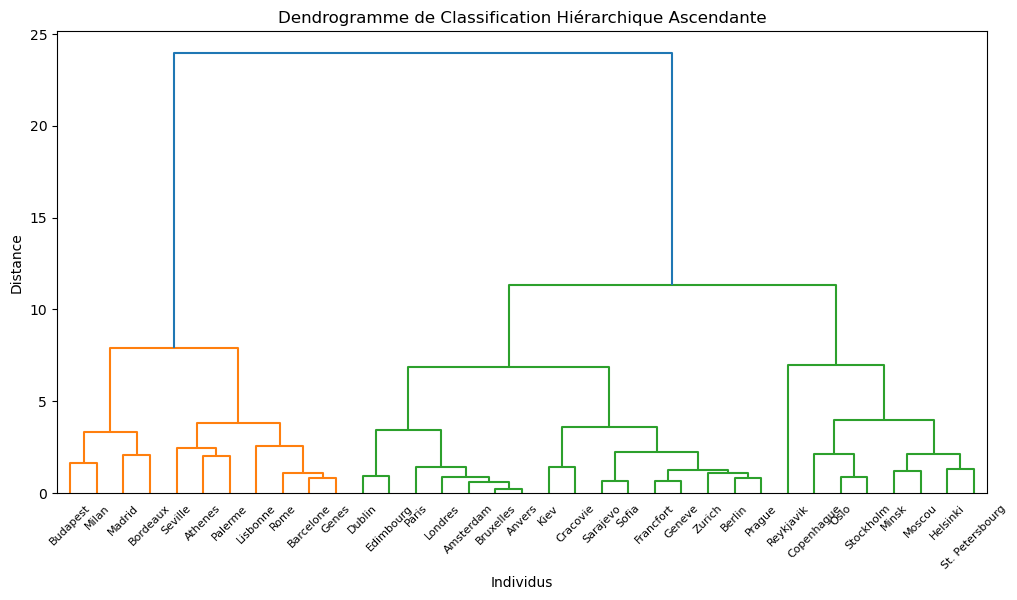

In [27]:
# Afficher le dendrogramme
plt.figure(figsize=(12, 6))

# Calculer la matrice de liaison
linkage_matrix = CAH(distance_matrix, method='ward')

# Afficher le dendrogramme
dendrogram_data = dendrogram(linkage_matrix, labels=list(df.index))

# Ajouter des titres et étiquettes
plt.title('Dendrogramme de Classification Hiérarchique Ascendante')
plt.xlabel('Individus')
plt.ylabel('Distance')

<h4>Q2: Choisir un nombre de classe et donc un seuil</h4>

J'ai choisi 3 classes et un seuil égal à 10

Nombre de classes: 3


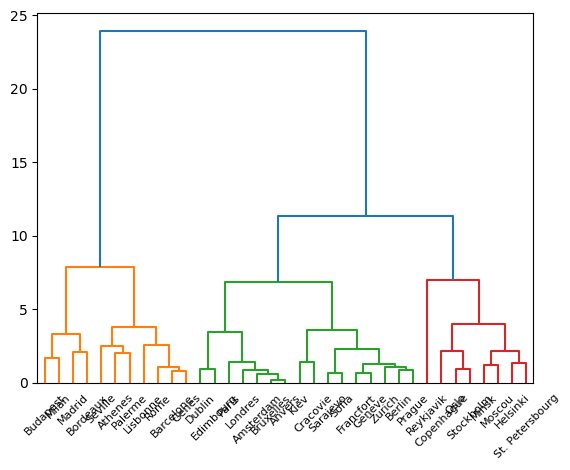

In [28]:
# Afficher le dendrogramme
linkage_matrix = CAH(distance_matrix, method='ward')
threshold = 10
dendrogram_data = dendrogram(linkage_matrix, labels=list(df.index), color_threshold=threshold)

# Appliquer le seuil pour obtenir les classes
classes = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Analyser les classes
unique_classes = set(classes)
print("Nombre de classes:", len(unique_classes))

# Visualiser les résultats sur la carte
Coord = df.loc[:, ['Latitude', 'Longitude']].values
plt.scatter(Coord[:, 1], Coord[:, 0], c=classes, s=20, cmap='viridis')
nom_ville = list(df.index)
for i, txt in enumerate(nom_ville):
    plt.annotate(txt, (Coord[i, 1], Coord[i, 0]))

# Afficher le graphique
plt.show()

<h4>Q3: Analyser les classes. Combien d’individus contiennent-elles ?</h4>

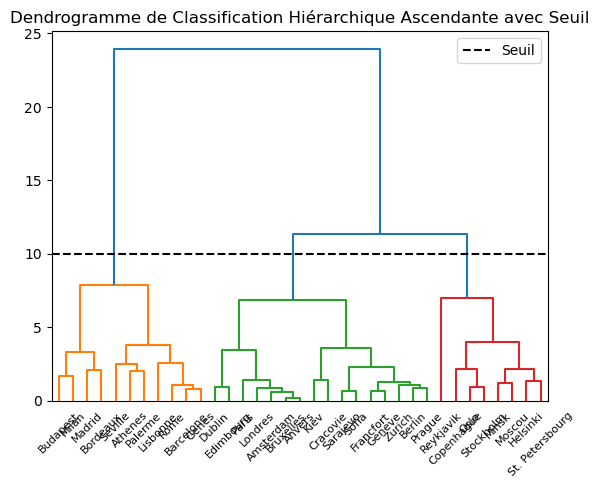

Cluster 2 : 16 individus
Cluster 1 : 11 individus
Cluster 3 : 8 individus
Nombre total d'individus (villes) : 35


In [29]:
# Déclarer le seuil
seuil = 10

dendrogram(linkage_matrix, labels=list(df.index), color_threshold=seuil)
plt.title('Dendrogramme de Classification Hiérarchique Ascendante avec Seuil')
plt.axhline(y=seuil, color='black', linestyle='--', label='Seuil')
plt.legend()
plt.show()

# Appliquer le seuil pour obtenir les clusters
clusters = fcluster(linkage_matrix, t=seuil, criterion='distance')


# Afficher le nombre d'individus dans chaque cluster
from collections import Counter

# clusters est la variable obtenue après l'application du seuil
cluster_counts = Counter(clusters)

# Afficher le nombre d'individus dans chaque cluster
for cluster_num, count in cluster_counts.items():
    print(f"Cluster {cluster_num} : {count} individus")


# Afficher le nombre total d'individus
total_individuals = len(clusters)
print(f"Nombre total d'individus (villes) : {total_individuals}")


><p>La classification hiérarchique ascendante (CAH) avec un seuil de 10 révèle la présence de trois clusters distincts</p><p><strong>Cluster 1: </strong>Ce cluster contient 11 individus (villes) qui sont similaires évaluées par l'algorithme.</p><p><strong>Cluster 2: </strong>Ce cluster est le plus grand parmi les trois, contenant 16 individus. Les villes regroupées dans ce cluster présentent des similitudes plus fortes entre elles par rapport aux autres clusters. </p><p><strong>Cluster 3: </strong>Ce cluster est le plus petit des trois, comprenant 8 individus. Les villes dans ce cluster peuvent être considérées comme distinctes des autres.</p>

<h4>Q4: Recommencer en utilisant une autre mesure de dissimilarité entre classe</h4>

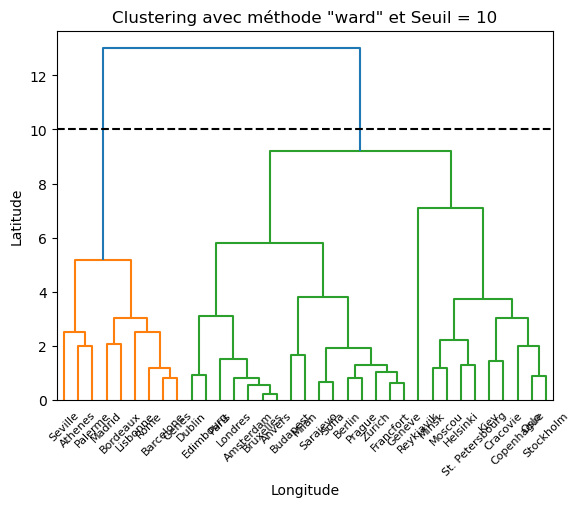

Nombre d'individus dans chaque cluster avec méthode complete:
1     9
2    26
dtype: int64



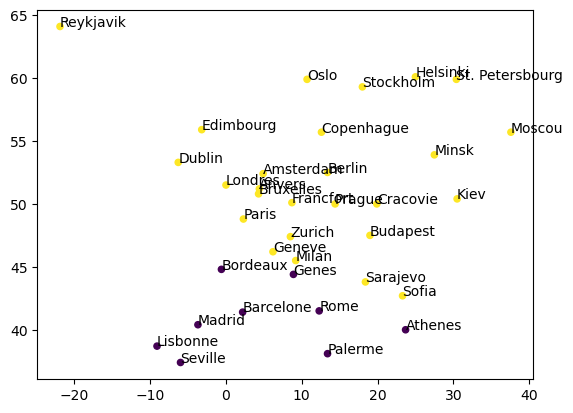

In [30]:
# Calculer la matrice de dissimilarité avec méthode 'complete'
linkage_matrix = CAH(scaled_data, method='complete')

# Choisir un nombre de classe et donc un seuil
threshold = 10
dendrogram_data = dendrogram(linkage_matrix, labels=list(df.index), color_threshold=threshold)

# Appliquer le seuil pour obtenir les classes
classes = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Visualiser les résultats sur la carte
Coord = df.loc[:, ['Latitude', 'Longitude']].values
plt.scatter(Coord[:, 1], Coord[:, 0], c=classes, s=20, cmap='viridis')
nom_ville = list(df.index)
for i, txt in enumerate(nom_ville):
    plt.annotate(txt, (Coord[i, 1], Coord[i, 0]))

plt.title(f'Clustering avec méthode "{method}" et Seuil = 10')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axhline(y=seuil, color='black', linestyle='--', label='Seuil')
plt.show()

# Visualiser les résultats sur la carte avec la nouvelle mesure de dissimilarité
Coord = df.loc[:, ['Latitude', 'Longitude']].values
plt.scatter(Coord[:, 1], Coord[:, 0], c=classes, s=20, cmap='viridis')

# Ajouter les étiquettes des villes
nom_ville = list(df.index)
for i, txt in enumerate(nom_ville):
    plt.annotate(txt, (Coord[i, 1], Coord[i, 0]))

# Afficher le nombre d'individus dans chaque cluster
cluster_counts = pd.Series(classes).value_counts().sort_index()
print(f"Nombre d'individus dans chaque cluster avec méthode complete:\n{cluster_counts}\n")

><p>En analysant les résultats de la classification hiérarchique ascendante (CAH) avec la méthode 'complete' et un seuil de 10: </p><p><strong>Nombre de Clusters : </strong>La méthode 'complete' a conduit à la formation de deux clusters distincts. Cluster 1 : Ce cluster contient 9 individus (villes). Cluster 2 : C'est le plus grand cluster, contenant 26 individus (villes).</p><p><strong>Comparaison avec la Méthode Ward : </strong>En comparant ces résultats avec la méthode précédente, on observe un changement dans la distribution des individus entre les clusters. La méthode 'complete' peut avoir des critères de regroupement différents de la méthode 'ward', conduisant à une partition différente des données.</p><p>En conclusion, le choix de la méthode de dissimilarité peut avoir un impact significatif sur les clusters formés.</p>

<h3>2.3 Méthode des K-Means</h3>

<h4>Q1 :  Utiliser la commande K-means pour le clustering.</h4>

In [31]:
k = 3  # le nombre de clusters je veux diviser
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajuster le modèle aux données
kmeans.fit(scaled_data)

# Obtenir les étiquettes des clusters
kmeans_labels = kmeans.labels_

<h4>Q2: Tracer la courbe d’inertie en fonction de nombre de clusters K. Trouver le K optimal en utilisant la règle de coude.</h4>

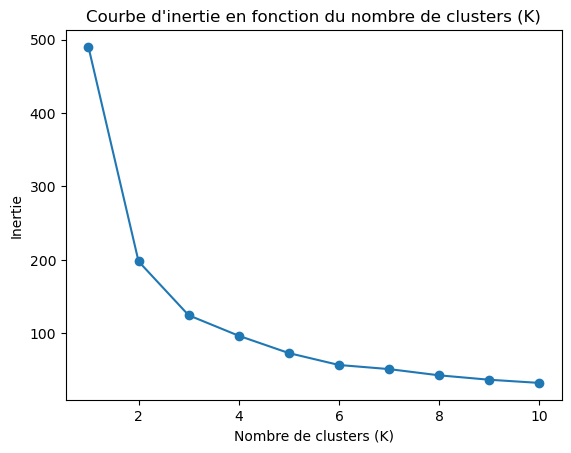

In [32]:
# Choisissez une plage de valeurs de k (par exemple, de 1 à 10)
k_values = range(1, 11)

# Calculer l'inertie pour chaque valeur de k
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Tracer la courbe d'inertie
plt.plot(k_values, inertias, marker='o')
plt.title("Courbe d'inertie en fonction du nombre de clusters (K)")
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')

plt.show()

><p>La courbe d'inertie tracée montre l'inertie (somme des carrés des distances des échantillons à leur centre de cluster le plus proche) en fonction du nombre de clusters (K).</p><p>Le coude: le point sur la courbe où la diminution de l'inertie ralentit, formant une courbe qui ressemble à un coude. Le nombre optimal de clusters (K) est généralement choisi à ce niveau.</p><p> Dans ce cas, un coude est clair autour de <strong>K=3</strong>, où la pente de la courbe d'inertie commence à diminuer de manière moins prononcée.</p>

<h4>Q3: Afficher les partitions en fonction des coordonnées géographiques.</h4>

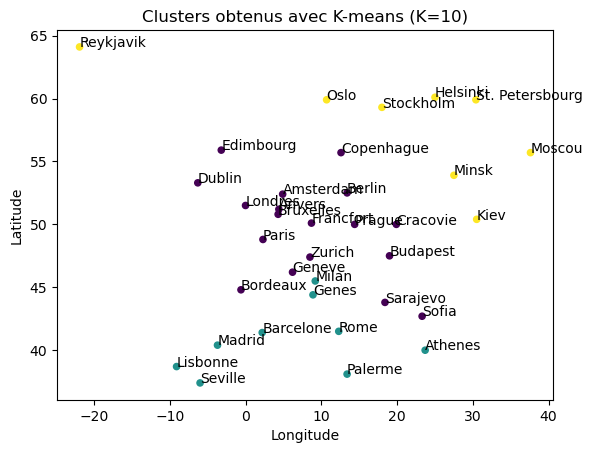

In [33]:
# Ajouter les étiquettes des clusters K-means aux données d'origine
df_kmeans = df.copy()
df_kmeans['Cluster_Kmeans'] = kmeans_labels

# Visualiser les résultats sur la carte
plt.scatter(df_kmeans['Longitude'], df_kmeans['Latitude'], c=kmeans_labels, s=20, cmap='viridis')
plt.title(f'Clusters obtenus avec K-means (K={k})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Ajouter le nom des villes à chaque point
for i, txt in enumerate(df_kmeans.index):
    plt.annotate(txt, (df_kmeans['Longitude'][i], df_kmeans['Latitude'][i]))
plt.show()


<h3>2.4 Comparaison des classifications</h3>

<h4>Q1: Comparer les classifications obtenues</h4>

In [34]:
# Afficher le dendrogramme
linkage_matrix = CAH(distance_matrix, method='ward')
threshold = 10
# Appliquer le seuil pour obtenir les classes
classes = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Comparaison des clusters entre CAH et K-means
ari_score = adjusted_rand_score(classes, kmeans_labels)
# Afficher le score d'ajustement Rand
print(f"Score d'ajustement Rand entre CAH et K-means : {ari_score}")

Score d'ajustement Rand entre CAH et K-means : 0.6543220558968591


Pour la CAH, j'ai choisi un seuil de 10 pour avoir 3 clusters.
Pour les K-Means, j'ai choisi 3 clusters K=3

**Pour un nombre de clusters K=3:**
La Classification Hiérarchique Ascendante (CAH) et la méthode des K-means ont toutes deux abouti à trois clusters distincts.

Le score d'ajustement Rand entre les classifications obtenues par la Classification Hiérarchique Ascendante (CAH) et la méthode des K-means est de 0.6543. Ce score mesure la similitude entre les deux ensembles de clusters, avec 0 indiquant aucune similitude et 1 indiquant une correspondance parfaite.

Une valeur de 0.6543 suggère une correspondance substantielle entre les clusters générés par la CAH et ceux générés par les K-means. Cela indique que, malgré les différences dans les approches algorithmiques, il y a une certaine cohérence dans la façon dont les deux méthodes regroupent les données. Une correspondance plus élevée suggère une similarité plus importante entre les deux ensembles de clusters.


Classifications par CAH et K-means fournit une base pour évaluer la similarité des résultats obtenus par ces deux approches de clustering. 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> PARTIE 3</h1>

<b>Réalisation algorithmique</b>
</div>

> <ol>Prototype <h4>[clas,g2] = coalescence (x ,K, g )</h4></ol>
> <ol>Distance entre x1,x2 ∈ R2 : <h4>d(x1,x2) = (x1 − x2)t(x1 − x2)</h4></ol>

<h4>Q1: Développer l'algorithme de coalescence</h4>

In [35]:
def coalescence(x, K, g):
    # Initialiser le nombre d'individus dans l'ens d'apprentissage x
    N = x.shape[0]

    # Initialiser des centres de gravité g2 en copiant g pour éviter de modifier directement les centres de gravité initiaux
    g2 = g.copy()

    # Initialiser des vecteurs de classe de taille N rempli de zéros
    clas = np.zeros(N, dtype=int)

    # Définir le nombre maximal d'itérations pour l'algo
    max_iterations = 100
    iteration = 0 # init le compteur

    while iteration < max_iterations:
        # Pour chaque individu, calcule les distances entre l'individu et les centres de gravité
        for i in range(N):
            distances = np.sum((x[i, :] - g2) ** 2, axis=1)
            clas[i] = np.argmin(distances)

        # Mise à jour des centres de gravité
        for j in range(K):
            if np.sum(clas == j) > 0:
                g2[j, :] = np.mean(x[clas == j, :], axis=0)

        iteration += 1

    return clas, g2


<h4>Q2: Appliquer l’algorithme de coalescence</h4>

In [36]:
# Les données générées aléatoirement
np.random.seed(42)

mean1 = np.array([2, 2])
cov1 = 2 * np.eye(2)
class1 = np.random.multivariate_normal(mean1, cov1, 128)

mean2 = np.array([-4, -4])
cov2 = 6 * np.eye(2)
class2 = np.random.multivariate_normal(mean2, cov2, 128)

x = np.concatenate((class1,class2), axis=0)

# Choix aléatoire de 2 individus comme centres initiaux
initial_centers = x[np.random.choice(256, 2, replace=False), :]

# Application de l'algorithme de coalescence
classes, new_centers = coalescence(x, 2, initial_centers)

print("Classes attribuées :", classes)
print("Nouveaux centres de gravité :\n", new_centers)



Classes attribuées : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
Nouveaux centres de gravité :
 [[ 1.82999427  2.01256096]
 [-3.98475125 -4.28945166]]


<h4>Q3: Etudier graphiquement le résultat de la partition</h4>

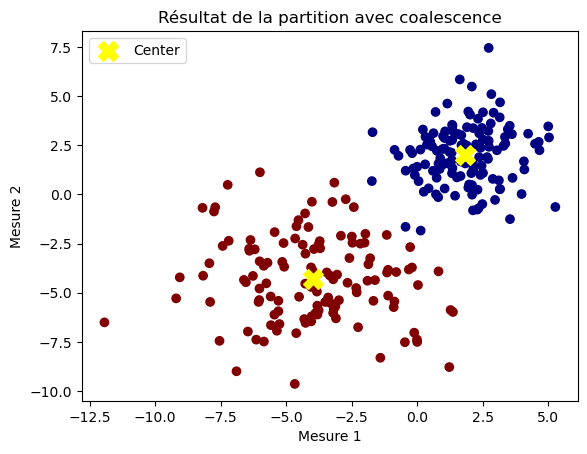

In [37]:
# Affichage des résultats
plt.scatter(x[:, 0], x[:, 1], c=classes, cmap='jet')
plt.scatter(new_centers[:, 0], new_centers[:, 1], marker='X', s=200, c='yellow', label='Center')
plt.title('Résultat de la partition avec coalescence')
plt.xlabel('Mesure 1')
plt.ylabel('Mesure 2')
plt.legend()
plt.show()


> <p>Les centres de gravité représentent les moyennes des individus de chaque classe. Le centre de gravité de la classe 0 est proche de [2,2], ce qui est cohérent avec la distribution bidimensionelle centrée en (2,2). De même, le centre de gravité de la classe 1 est proche de [-4,-4], en accord avec la distribution gaussienne centrée en (-4, -4).</p> <p>Le résultat suggère que l'algo de coalescence a bien réussi à regrouper les individus, tous les individus ont été assignés à l'une des deux classes (0 ou 1)</p>



<h4>Q4: Tester plusieurs fois et reporter les résultats</h4>

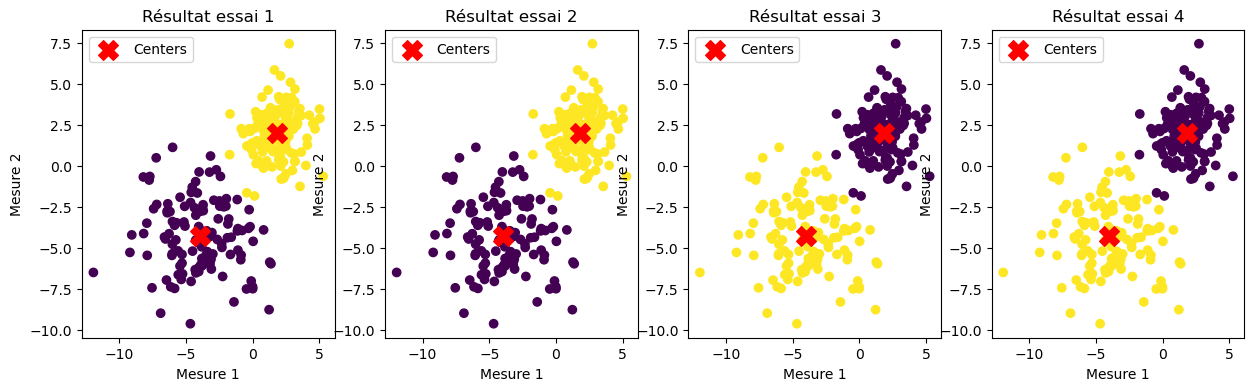

In [38]:
# Nombre d'essais
num_trials = 4
results = []

# Créer une grille de sous-graphiques avec une seule ligne et num_trials colonnes
fig, axes = plt.subplots(1, num_trials, figsize=(15, 4))

for i in range(num_trials):
    # Choix aléatoire de 2 individus comme centres initiaux
    initial_centers = x[np.random.choice(256, 2, replace=False), :]

    # Application de l'algorithme de coalescence
    classes, new_centers = coalescence(x, 2, initial_centers)

    # Stockage des résultats
    results.append((classes, new_centers))

    # Affichage dans le sous-graphique correspondant
    axes[i].scatter(x[:, 0], x[:, 1], c=classes, cmap='viridis')
    axes[i].scatter(new_centers[:, 0], new_centers[:, 1], marker='X', s=200, c='red', label='Centers')
    axes[i].set_title(f'Résultat essai {i + 1}')
    axes[i].set_xlabel('Mesure 1')
    axes[i].set_ylabel('Mesure 2')
    axes[i].legend()

plt.show()

> <p>L'algorithme de k-means démontre une stabilité et une cohérence dans la partition des individus en classes. -> Les résultats obtenus sur plusieurs essais montrent une convergence vers des solutions similaires.</p><p>Les centres de gravité, marqués sur les graphiques, sont placés au milieu des groupes de points, suggérant une bonne qualité de la partition</p>